# Otto Assignment Week 7 Final Project

## Gather links to pages containing data by scraping tables and 
## Scrape data from HTML tables into Pandas tables

I'm going to start by pulling the entire National League batting table for 2022 and I'll just drop the rows that aren't in the NL West. I've already looked and they are the same stats just in one table. As a dataframe, they should be easier to handle. 

In [13]:
from gazpacho import get, Soup
import pandas as pd
import requests

In [14]:
url_nlwest="https://www.baseball-reference.com/leagues/NL/2022.shtml"

html = get(url_nlwest)
soup = Soup(html)   

In [15]:
div = soup.find('div', {'id':'div_teams_standard_batting'})

In [16]:
df = pd.read_html(str(div.html))[0]

In [17]:
df

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,...,0.385,0.689,95,2061,97,60,31,50,14,1039
1,Atlanta Braves,53,27.5,4.87,162,6082,5509,789,1394,298,...,0.443,0.761,111,2443,103,66,1,36,13,1030
2,Chicago Cubs,64,27.9,4.06,162,6072,5425,657,1293,265,...,0.387,0.698,96,2097,130,84,19,36,16,1100
3,Cincinnati Reds,66,29.4,4.00,162,5978,5380,648,1264,235,...,0.372,0.676,83,2003,127,92,12,33,6,1020
4,Colorado Rockies,43,29.1,4.31,162,6105,5540,698,1408,280,...,0.398,0.713,90,2203,139,61,10,40,10,1113
5,Los Angeles Dodgers,51,29.6,5.23,162,6247,5526,847,1418,325,...,0.442,0.775,112,2441,85,56,3,53,22,1159
6,Miami Marlins,56,28.8,3.62,162,5949,5395,586,1241,248,...,0.363,0.658,86,1961,120,70,4,36,6,1045
7,Milwaukee Brewers,51,29.1,4.48,162,6122,5417,725,1271,251,...,0.409,0.724,105,2213,117,80,11,37,25,1102
8,New York Mets,61,29.7,4.77,162,6176,5489,772,1422,272,...,0.412,0.744,113,2261,122,112,20,44,25,1158
9,Philadelphia Phillies,56,28.1,4.61,162,6077,5496,747,1392,255,...,0.422,0.739,107,2320,116,52,6,44,15,1075


Now, I'll drop the rows I do not need. 
Then, I'll transpose the df just to make sure I don't have any weird collumn headings like the example. 

In [18]:
df.drop([1,2,3,6,7,8,9,10,13,14,15,16], axis=0, inplace=True)

df.T

,0,4,5,11,12
Tm,Arizona Diamondbacks,Colorado Rockies,Los Angeles Dodgers,San Diego Padres,San Francisco Giants
#Bat,57,43,51,55,66
BatAge,26.5,29.1,29.6,28.2,30.0
R/G,4.33,4.31,5.23,4.35,4.42
G,162,162,162,162,162
PA,6027,6105,6247,6175,6117
AB,5351,5540,5526,5468,5392
R,702,698,847,705,716
H,1232,1408,1418,1317,1261
2B,262,280,325,275,255


There is a weird collmn that should just be called BA for batting average. 

In [19]:
df.rename(columns = {'Gold means awarded title at end of year." data-filter="1" data-name="Batting Average">BA':'BA'}, inplace = True)

In [20]:
df.T

,0,4,5,11,12
Tm,Arizona Diamondbacks,Colorado Rockies,Los Angeles Dodgers,San Diego Padres,San Francisco Giants
#Bat,57,43,51,55,66
BatAge,26.5,29.1,29.6,28.2,30.0
R/G,4.33,4.31,5.23,4.35,4.42
G,162,162,162,162,162
PA,6027,6105,6247,6175,6117
AB,5351,5540,5526,5468,5392
R,702,698,847,705,716
H,1232,1408,1418,1317,1261
2B,262,280,325,275,255


Perfect. Now, I can grab the table for the Japanese teams. 

I'm getting an error trying to scrape this page. I can see that the html code contains a '!' which BeautifulSoup cannot read. I will remove that before proceeding. 

In [21]:
urljapan = 'https://www.baseball-reference.com/register/league.cgi?id=6ffa4c10'

html = requests.get(urljapan)
html.text

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/br/deploy/www" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202211181" />\n    <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\n<script type="text/javascript" async=true>\n    (function() {\n\tvar host = window.location.hostname;\n\tvar element = document.createElement(\'script\');\n\tvar firstScript = document.getElementsByTagName(\'script\')[0];\n\tvar url = \'https://cmp.quantcast.com\'\n\t    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \n\t\t    \'/choice.js?tag_version=V2\');\n\tvar uspTries = 0;\n\tvar uspTriesLimit = 3;\n\telement.async = true;\n\telement.type = \'text/javascript\';\n\telement.src = url;\n\t\n\tfirstScript.parentNode.insertBefore(element, 

In [22]:
new_html = html.text.replace('<!', '')

In [23]:
from bs4 import BeautifulSoup

In [24]:
new_html = BeautifulSoup(new_html, 'html.parser')

In [25]:
div = str(new_html.find('div', {'id':'div_league_batting'}))

In [26]:
div

'<div class="table_container" id="div_league_batting">\n<table class="sortable stats_table" data-cols-to-freeze=",1" id="league_batting">\n<caption>League Batting</caption>\n<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>\n<thead>\n<tr>\n<th aria-label="Tm" class="poptip sort_default_asc show_partial_when_sorting center" data-stat="team_ID" scope="col">Tm</th>\n<th aria-label="Aff" class="poptip sort_default_asc center" data-stat="affiliation" data-tip="&lt;strong&gt;Affiliation&lt;/strong&gt;&lt;br&gt;Major league franchise(s) that either owns this affiliate or has an agreement with this team." scope="col">Aff</th>\n<th aria-label="BatAge" class="poptip sort_default_asc center" data-stat="age_bat" data-tip="&lt;strong&gt;Batters&amp;#x2019; average age&lt;/strong&gt;&lt;br&gt;Weighted by AB + Games Played" scope="col">BatAge</th>\n<th aria-label="Runs

In [27]:
dfj = pd.read_html(div)[0]

In [28]:
dfj

,Tm,Aff,BatAge,R/G,G,PA,AB,R,H,2B,...,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
0,Yakult Swallows,NaN,27.2,4.33,143,5446,4834,619,1209,210,...,0.250,0.318,0.410,0.728,1981,102,55,86,29,34
1,Hiroshima Carp,NaN,28.2,3.86,143,5394,4865,552,1248,200,...,0.257,0.309,0.364,0.673,1771,112,53,118,31,20
2,Yomiuri Giants,NaN,28.8,3.83,143,5341,4788,548,1161,199,...,0.243,0.309,0.392,0.701,1877,89,36,73,15,25
3,Yokohama Bay Stars,NaN,28.5,3.48,143,5275,4746,497,1190,228,...,0.251,0.308,0.378,0.686,1793,109,54,102,22,30
4,Hanshin Tigers,NaN,27.6,3.42,143,5323,4767,489,1160,152,...,0.243,0.301,0.337,0.638,1606,90,47,119,32,21
5,Chunichi Dragons,NaN,27.7,2.90,143,5283,4750,414,1172,208,...,0.247,0.301,0.341,0.642,1620,92,57,123,30,21
6,League Totals,NaN,28.0,3.64,858,32062,28750,3119,7140,1197,...,0.248,0.308,0.370,0.678,10648,594,302,621,159,151


Great! Now, I have a second dataframe. I will drop the last column that is League Totals and make sure that there is not that weird column header like the first. 

In [29]:
dfj.drop([6], axis=0, inplace=True)

dfj.T

,0,1,2,3,4,5
Tm,Yakult Swallows,Hiroshima Carp,Yomiuri Giants,Yokohama Bay Stars,Hanshin Tigers,Chunichi Dragons
Aff,NaN,NaN,NaN,NaN,NaN,NaN
BatAge,27.2,28.2,28.8,28.5,27.6,27.7
R/G,4.33,3.86,3.83,3.48,3.42,2.9
G,143,143,143,143,143,143
PA,5446,5394,5341,5275,5323,5283
AB,4834,4865,4788,4746,4767,4750
R,619,552,548,497,489,414
H,1209,1248,1161,1190,1160,1172
2B,210,200,199,228,152,208


The column names look great. However, it doesn't appear that the column headers match the first dataframe. It makes sense to only include the columns that are needed for the Base Runs statistic. So, I will remove the unused columns from each dataframe before trying to combine them. 

In [30]:
df_copy = df.copy()

In [31]:
df_copy.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')

In [32]:
drop_cols = ['#Bat', 'BatAge', 'R/G', 'G', 'PA', '2B', '3B', 'RBI', 'SB', 'CS', 'SO', 'BA', 'OBP', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB']

df_copy.drop(drop_cols,axis=1,inplace=True)

In [33]:
df_copy

,Tm,AB,R,H,HR,BB,SLG
0,Arizona Diamondbacks,5351,702,1232,173,531,0.385
4,Colorado Rockies,5540,698,1408,149,453,0.398
5,Los Angeles Dodgers,5526,847,1418,212,607,0.442
11,San Diego Padres,5468,705,1317,153,574,0.382
12,San Francisco Giants,5392,716,1261,183,571,0.390


In [34]:
df_copy = df_copy.assign(LEAGUE=[1,1,1,1,1])

In [35]:
df_copy

,Tm,AB,R,H,HR,BB,SLG,LEAGUE
0,Arizona Diamondbacks,5351,702,1232,173,531,0.385,1
4,Colorado Rockies,5540,698,1408,149,453,0.398,1
5,Los Angeles Dodgers,5526,847,1418,212,607,0.442,1
11,San Diego Padres,5468,705,1317,153,574,0.382,1
12,San Francisco Giants,5392,716,1261,183,571,0.390,1


In [36]:
dfj_copy = dfj.copy()

In [37]:
dfj_copy.columns

Index(['Tm', 'Aff', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB'],
      dtype='object')

In [38]:
drop_cols = ['Aff', 'BatAge', 'R/G', 'G', 'PA', '2B', '3B', 'RBI', 'SB', 'CS', 'SO', 'BA', 'OBP', 'OPS', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB']

dfj_copy.drop(drop_cols,axis=1,inplace=True)

dfj_copy

,Tm,AB,R,H,HR,BB,SLG
0,Yakult Swallows,4834,619,1209,174,442,0.410
1,Hiroshima Carp,4865,552,1248,91,327,0.364
2,Yomiuri Giants,4788,548,1161,163,429,0.392
3,Yokohama Bay Stars,4746,497,1190,117,351,0.378
4,Hanshin Tigers,4767,489,1160,84,358,0.337
5,Chunichi Dragons,4750,414,1172,62,323,0.341


In [39]:
dfj_copy = dfj_copy.assign(LEAGUE=[2,2,2,2,2,2])

In [40]:
dfj_copy

,Tm,AB,R,H,HR,BB,SLG,LEAGUE
0,Yakult Swallows,4834,619,1209,174,442,0.410,2
1,Hiroshima Carp,4865,552,1248,91,327,0.364,2
2,Yomiuri Giants,4788,548,1161,163,429,0.392,2
3,Yokohama Bay Stars,4746,497,1190,117,351,0.378,2
4,Hanshin Tigers,4767,489,1160,84,358,0.337,2
5,Chunichi Dragons,4750,414,1172,62,323,0.341,2


In [41]:
df_new = pd.concat([df_copy, dfj_copy], axis=0)

In [42]:
df_new

,Tm,AB,R,H,HR,BB,SLG,LEAGUE
0,Arizona Diamondbacks,5351,702,1232,173,531,0.385,1
4,Colorado Rockies,5540,698,1408,149,453,0.398,1
5,Los Angeles Dodgers,5526,847,1418,212,607,0.442,1
11,San Diego Padres,5468,705,1317,153,574,0.382,1
12,San Francisco Giants,5392,716,1261,183,571,0.390,1
0,Yakult Swallows,4834,619,1209,174,442,0.410,2
1,Hiroshima Carp,4865,552,1248,91,327,0.364,2
2,Yomiuri Giants,4788,548,1161,163,429,0.392,2
3,Yokohama Bay Stars,4746,497,1190,117,351,0.378,2
4,Hanshin Tigers,4767,489,1160,84,358,0.337,2


In [43]:
df_new.columns

Index(['Tm', 'AB', 'R', 'H', 'HR', 'BB', 'SLG', 'LEAGUE'], dtype='object')

I would like to reset the index, but when I do, and try to delete the old index, I delete the whole dataframe. So for now, it will stay because I don't think it will impact my analysis. I just don't like that there are duplicates. 

## Calculate new statistic

Next, I will work on implementing the statistics Base Runs provided above. 

In [44]:
dfn= df_new

In [45]:
dfn.columns

Index(['Tm', 'AB', 'R', 'H', 'HR', 'BB', 'SLG', 'LEAGUE'], dtype='object')

In [46]:
A = dfn.H + dfn.BB - dfn.HR
B = (1.4*dfn.SLG - .6*dfn.H - 3*dfn.HR + .1*dfn.BB)*1.02
C = dfn.AB - dfn.H
D = dfn.HR

In [47]:
BRuns_list = []

for row in dfn:
    BRuns = [A*(B/(B + C)) + D]
    
BRuns
#dfn = dfn.assign(BASERUNS=[BRuns])

[0    -502.889955
 4    -611.436894
 5    -781.246515
 11   -566.309399
 12   -551.419116
 0    -581.446753
 1    -482.636371
 2    -512.240803
 3    -479.614354
 4    -414.150188
 5    -400.866440
 dtype: float64]

These numbers do not look useful. If we took the above advice and rounded all negatives to 0(as suggested), we would have all 0's. I looked up the research again, and it looks like the equation provided for the assignment may have been copied wrong. The wikipedia page sited above uses Total Bases instead of SLG which is a percentage of total bases. I believe this may be throwing off my calculations. 

A = H + BB - HR

B = (1.4 * TB - .6 * H - 3 * HR + .1 * BB) * 1.02

C = AB - H

D = HR

https://en.wikipedia.org/wiki/Base_runs

So, I'll start over keeping the TB column

In [48]:
dfcopy1 = df.copy()

In [49]:
dfcopy1.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')

In [50]:
drop_cols = ['#Bat', 'BatAge', 'R/G', 'G', 'PA', '2B', '3B', 'RBI', 'SB', 'CS', 'SO', 'BA', 'OBP', 'OPS', 'OPS+', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB']

dfcopy1.drop(drop_cols,axis=1,inplace=True)

In [51]:
dfcopy1

,Tm,AB,R,H,HR,BB,SLG,TB
0,Arizona Diamondbacks,5351,702,1232,173,531,0.385,2061
4,Colorado Rockies,5540,698,1408,149,453,0.398,2203
5,Los Angeles Dodgers,5526,847,1418,212,607,0.442,2441
11,San Diego Padres,5468,705,1317,153,574,0.382,2087
12,San Francisco Giants,5392,716,1261,183,571,0.390,2101


In [52]:
dfcopy1 = dfcopy1.assign(LEAGUE=['NLW', 'NLW', 'NLW', 'NLW', 'NLW'])
dfcopy1

,Tm,AB,R,H,HR,BB,SLG,TB,LEAGUE
0,Arizona Diamondbacks,5351,702,1232,173,531,0.385,2061,NLW
4,Colorado Rockies,5540,698,1408,149,453,0.398,2203,NLW
5,Los Angeles Dodgers,5526,847,1418,212,607,0.442,2441,NLW
11,San Diego Padres,5468,705,1317,153,574,0.382,2087,NLW
12,San Francisco Giants,5392,716,1261,183,571,0.390,2101,NLW


In [53]:
dfjcopy1 = dfj.copy()

In [54]:
dfjcopy1.columns

Index(['Tm', 'Aff', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB'],
      dtype='object')

In [55]:
drop_cols = ['Aff', 'BatAge', 'R/G', 'G', 'PA', '2B', '3B', 'RBI', 'SB', 'CS', 'SO', 'BA', 'OBP', 'OPS', 'GDP', 'HBP', 'SH', 'SF', 'IBB']

dfjcopy1.drop(drop_cols,axis=1,inplace=True)

dfjcopy1

,Tm,AB,R,H,HR,BB,SLG,TB
0,Yakult Swallows,4834,619,1209,174,442,0.410,1981
1,Hiroshima Carp,4865,552,1248,91,327,0.364,1771
2,Yomiuri Giants,4788,548,1161,163,429,0.392,1877
3,Yokohama Bay Stars,4746,497,1190,117,351,0.378,1793
4,Hanshin Tigers,4767,489,1160,84,358,0.337,1606
5,Chunichi Dragons,4750,414,1172,62,323,0.341,1620


In [56]:
dfjcopy1 = dfjcopy1.assign(LEAGUE=['JCENT','JCENT','JCENT','JCENT','JCENT','JCENT'])
dfjcopy1

,Tm,AB,R,H,HR,BB,SLG,TB,LEAGUE
0,Yakult Swallows,4834,619,1209,174,442,0.410,1981,JCENT
1,Hiroshima Carp,4865,552,1248,91,327,0.364,1771,JCENT
2,Yomiuri Giants,4788,548,1161,163,429,0.392,1877,JCENT
3,Yokohama Bay Stars,4746,497,1190,117,351,0.378,1793,JCENT
4,Hanshin Tigers,4767,489,1160,84,358,0.337,1606,JCENT
5,Chunichi Dragons,4750,414,1172,62,323,0.341,1620,JCENT


In [57]:
newdf = pd.concat([dfcopy1, dfjcopy1], axis=0)
newdf

,Tm,AB,R,H,HR,BB,SLG,TB,LEAGUE
0,Arizona Diamondbacks,5351,702,1232,173,531,0.385,2061,NLW
4,Colorado Rockies,5540,698,1408,149,453,0.398,2203,NLW
5,Los Angeles Dodgers,5526,847,1418,212,607,0.442,2441,NLW
11,San Diego Padres,5468,705,1317,153,574,0.382,2087,NLW
12,San Francisco Giants,5392,716,1261,183,571,0.390,2101,NLW
0,Yakult Swallows,4834,619,1209,174,442,0.410,1981,JCENT
1,Hiroshima Carp,4865,552,1248,91,327,0.364,1771,JCENT
2,Yomiuri Giants,4788,548,1161,163,429,0.392,1877,JCENT
3,Yokohama Bay Stars,4746,497,1190,117,351,0.378,1793,JCENT
4,Hanshin Tigers,4767,489,1160,84,358,0.337,1606,JCENT


OK, so now I have the df with the TB left in. I can continue with the new formula. 

In [58]:
A = newdf.H + newdf.BB - newdf.HR
B = (1.4*newdf.TB - .6*newdf.H - 3*newdf.HR + .1*newdf.BB)*1.02
C = newdf.AB - newdf.H
D = newdf.HR

In [62]:
BASERUNS = [A*(B/(B + C)) + D]

BASERUNS

[0     640.196032
 4     683.269512
 5     811.829917
 11    671.438502
 12    669.094499
 0     626.601557
 1     530.126096
 2     583.401730
 3     541.426775
 4     477.252093
 5     473.085521
 dtype: float64]

Those numbers look better. I will stick with this formula. 

In [68]:
type(BASERUNS)

list

In [93]:
list = str(BASERUNS)
list

'[0     640.196032\n4     683.269512\n5     811.829917\n11    671.438502\n12    669.094499\n0     626.601557\n1     530.126096\n2     583.401730\n3     541.426775\n4     477.252093\n5     473.085521\ndtype: float64]'

In [94]:
list = list.split()

In [105]:
list

['[0',
 '640.196032',
 '4',
 '683.269512',
 '5',
 '811.829917',
 '11',
 '671.438502',
 '12',
 '669.094499',
 '0',
 '626.601557',
 '1',
 '530.126096',
 '2',
 '583.401730',
 '3',
 '541.426775',
 '4',
 '477.252093',
 '5',
 '473.085521',
 'dtype:',
 'float64]']

In [106]:
list2 = list[1::2]

In [107]:
list2

['640.196032',
 '683.269512',
 '811.829917',
 '671.438502',
 '669.094499',
 '626.601557',
 '530.126096',
 '583.401730',
 '541.426775',
 '477.252093',
 '473.085521',
 'float64]']

In [108]:
list2 = list2[0:11]

In [109]:
list2

['640.196032',
 '683.269512',
 '811.829917',
 '671.438502',
 '669.094499',
 '626.601557',
 '530.126096',
 '583.401730',
 '541.426775',
 '477.252093',
 '473.085521']

In [111]:
len(list2)

11

In [126]:
type(list2)

list

So, now I have a list of BASERUNS elements that I want to add to a new column in the newdf. 

In [131]:
newdf['BASERUNS'] = list2

In [132]:
newdf

,Tm,AB,R,H,HR,BB,SLG,TB,LEAGUE,BASERUNS,BASERUNS1
0,Arizona Diamondbacks,5351,702,1232,173,531,0.385,2061,NLW,640.196032,"[640.196032, 683.269512, 811.829917, 671.43850..."
4,Colorado Rockies,5540,698,1408,149,453,0.398,2203,NLW,683.269512,NaN
5,Los Angeles Dodgers,5526,847,1418,212,607,0.442,2441,NLW,811.829917,NaN
11,San Diego Padres,5468,705,1317,153,574,0.382,2087,NLW,671.438502,NaN
12,San Francisco Giants,5392,716,1261,183,571,0.390,2101,NLW,669.094499,NaN
0,Yakult Swallows,4834,619,1209,174,442,0.410,1981,JCENT,626.601557,"[640.196032, 683.269512, 811.829917, 671.43850..."
1,Hiroshima Carp,4865,552,1248,91,327,0.364,1771,JCENT,530.126096,NaN
2,Yomiuri Giants,4788,548,1161,163,429,0.392,1877,JCENT,583.401730,NaN
3,Yokohama Bay Stars,4746,497,1190,117,351,0.378,1793,JCENT,541.426775,NaN
4,Hanshin Tigers,4767,489,1160,84,358,0.337,1606,JCENT,477.252093,NaN


I'll remove BASERUNS1 as that was a former attempt to get the final column in. 

In [133]:
newdf.drop('BASERUNS1', axis=1, inplace=True)
newdf

,Tm,AB,R,H,HR,BB,SLG,TB,LEAGUE,BASERUNS
0,Arizona Diamondbacks,5351,702,1232,173,531,0.385,2061,NLW,640.196032
4,Colorado Rockies,5540,698,1408,149,453,0.398,2203,NLW,683.269512
5,Los Angeles Dodgers,5526,847,1418,212,607,0.442,2441,NLW,811.829917
11,San Diego Padres,5468,705,1317,153,574,0.382,2087,NLW,671.438502
12,San Francisco Giants,5392,716,1261,183,571,0.390,2101,NLW,669.094499
0,Yakult Swallows,4834,619,1209,174,442,0.410,1981,JCENT,626.601557
1,Hiroshima Carp,4865,552,1248,91,327,0.364,1771,JCENT,530.126096
2,Yomiuri Giants,4788,548,1161,163,429,0.392,1877,JCENT,583.401730
3,Yokohama Bay Stars,4746,497,1190,117,351,0.378,1793,JCENT,541.426775
4,Hanshin Tigers,4767,489,1160,84,358,0.337,1606,JCENT,477.252093


Finally! I have a dataframe that I can start creating visualizations to explore the relationship between teams and their Base Run score. Then, compare leagues. I need to change my BASERUNS stat back to an integer because I changed it to a string to split my list earlier. 

In [153]:
type(newdf.BASERUNS)

pandas.core.series.Series

In [164]:
newdf['BASERUNS'] = pd.to_numeric(newdf['BASERUNS'])

In [165]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 5
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tm        11 non-null     object 
 1   AB        11 non-null     int64  
 2   R         11 non-null     int64  
 3   H         11 non-null     int64  
 4   HR        11 non-null     int64  
 5   BB        11 non-null     int64  
 6   SLG       11 non-null     float64
 7   TB        11 non-null     int64  
 8   LEAGUE    11 non-null     object 
 9   BASERUNS  11 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.2+ KB


## Create visualizations and Perform EDA

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

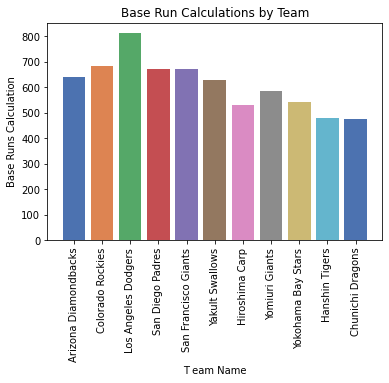

In [174]:
colors = sns.color_palette('deep')

plt.bar(newdf['Tm'], newdf['BASERUNS'], color= colors)
plt.xlabel('T eam Name')
plt.xticks(rotation = 90)
plt.ylabel('Base Runs Calculation')
plt.title('Base Run Calculations by Team')
plt.show()

#### With this plot, I can see that LA has the best Base Run calculation. There are three teams - Colorado, San Diego and San Fransisco that are not far behind. Overall, the NLW looks superior to Japan's Central League. 

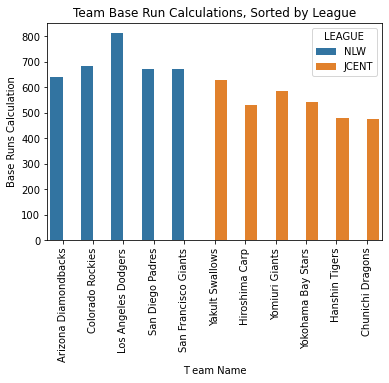

In [178]:
sns.barplot(x = 'Tm',
            y = 'BASERUNS',
            hue = 'LEAGUE',
            data = newdf)
plt.ylabel('Base Runs Calculation')
plt.xlabel('T eam Name')
plt.title('Team Base Run Calculations, Sorted by League')
plt.xticks(rotation=90)
plt.show()

#### Next, I want to create a boxplot grouped by LEAGUE to show the differences. 

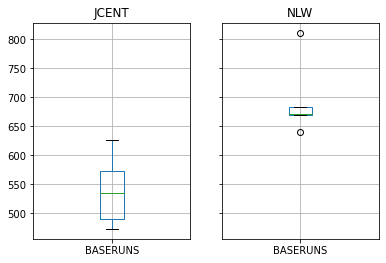

In [185]:
newdf.groupby("LEAGUE").boxplot(column="BASERUNS");

#### Here, I can see the mean and bulk of NL West Base Run Calculations are above even where the outliers for the Japan Central League start. 

#### It seems pretty clear that there is a difference in means, but to make sure it is stastically significant, I can run a One Way Anova test to compare means. It think this will be ok since the sample sizes are (almost) equal even though they are small.

Code help from: https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

In [199]:
from scipy.stats import f_oneway

In [209]:
nlw = newdf[newdf.LEAGUE == 'NLW']
jcent = newdf[newdf.LEAGUE == 'JCENT']


In [205]:
f_oneway(nlw.BASERUNS, jcent.BASERUNS)

F_onewayResult(statistic=16.747783171313788, pvalue=0.002707275877177632)

#### With a Pvalue of .002 I can say that the difference in means of Base Run Calculations between in the NL West and Japan Central League is significant statistically. 

#### Next, I want to see if there is one or more column that is closely related to the BASERUNS statistic. 

In [191]:
newdf = newdf.reset_index()

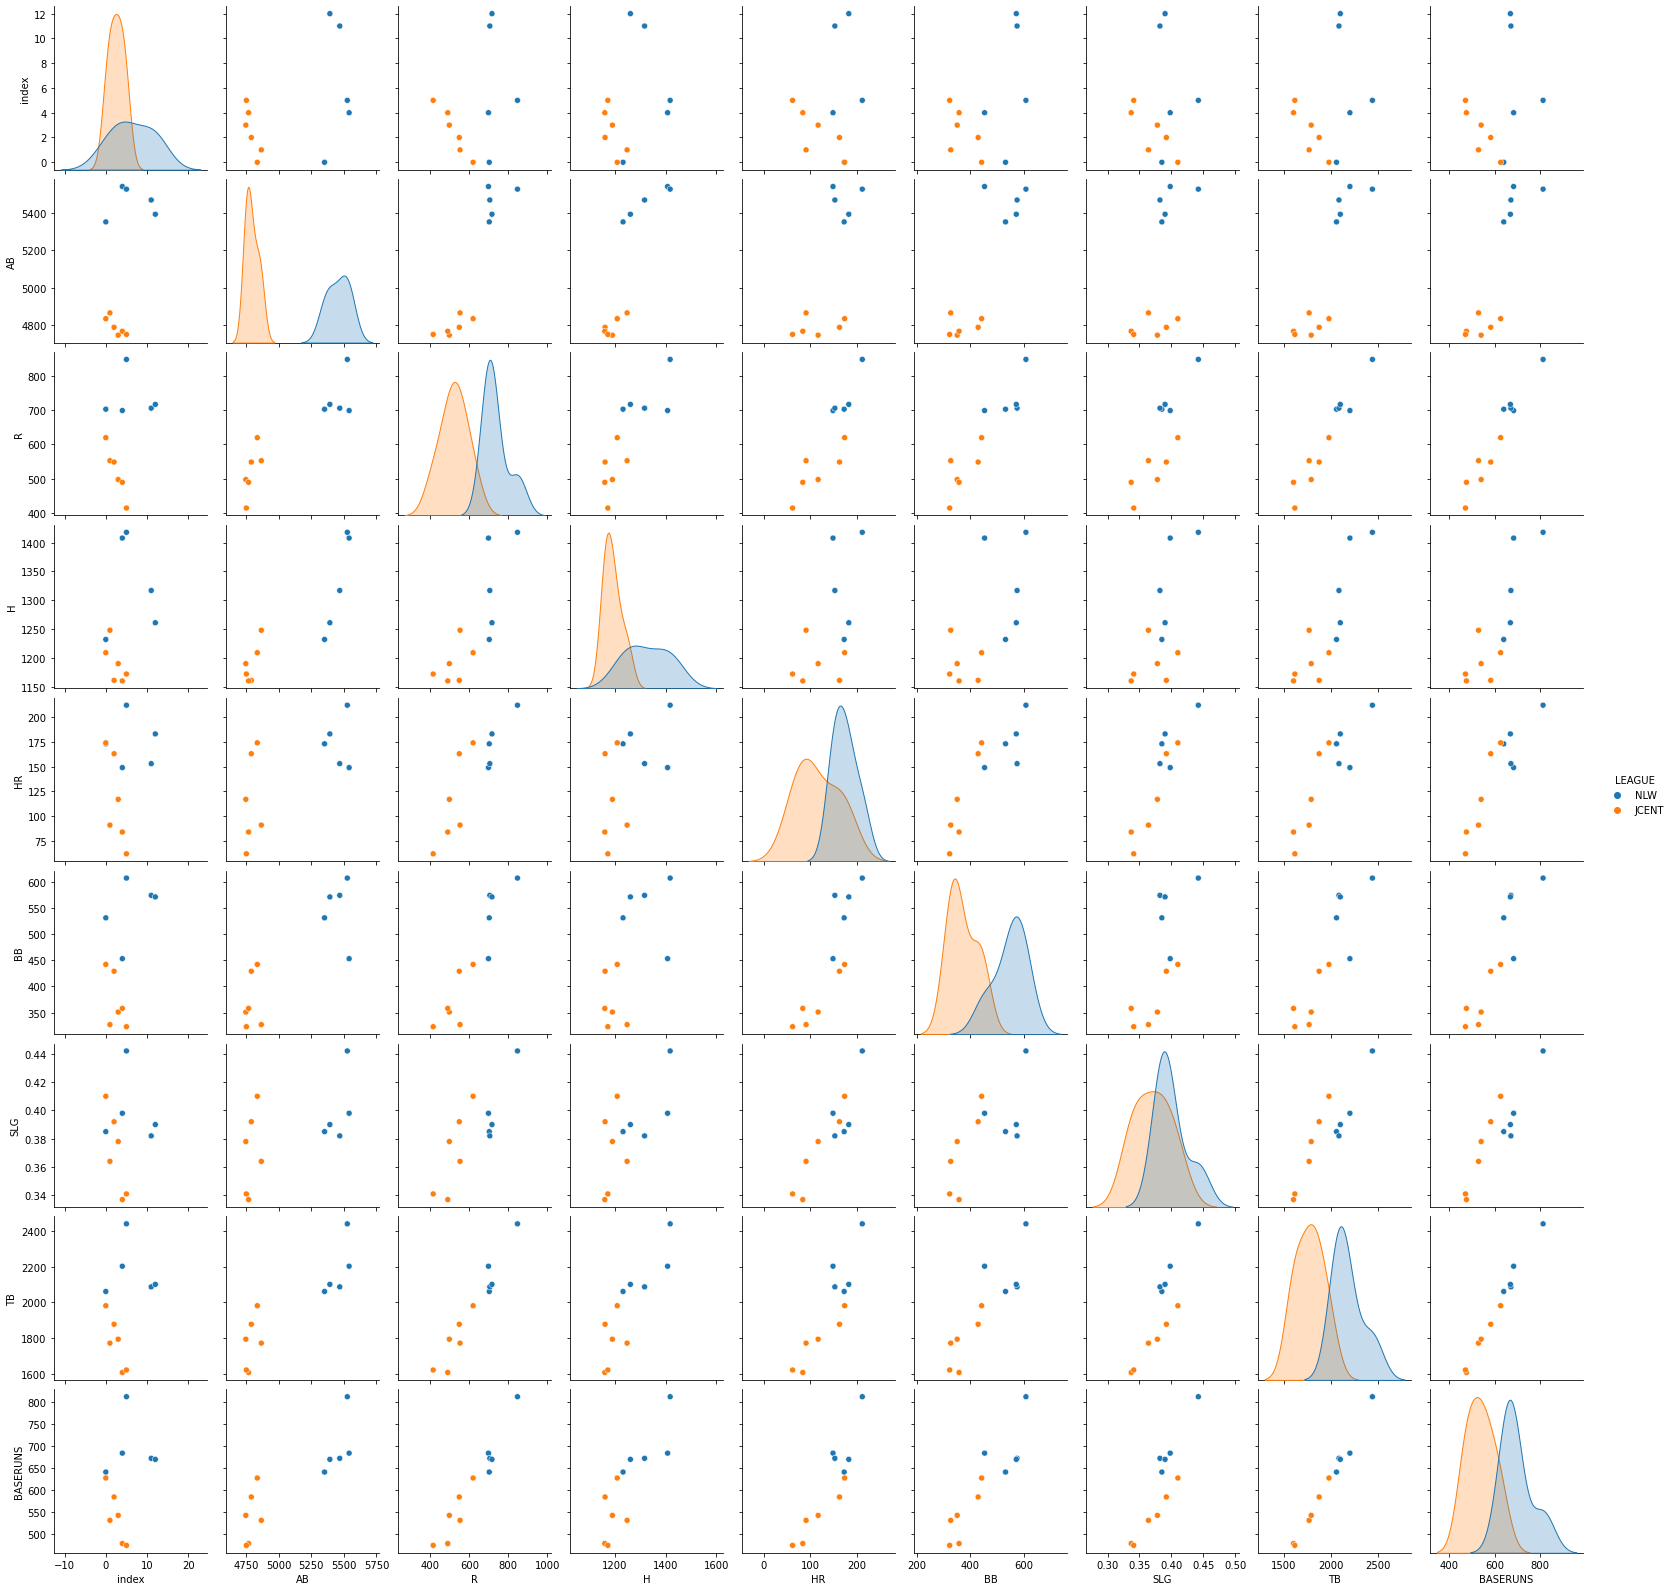

In [192]:
sns.pairplot(newdf, hue ='LEAGUE')

#### Looking at the last column - BASERUNS for linear relationships, it looks like Total Bases and At Bats each form a relatively straight line with BASERUNS. Which makes sense. The more chances to hit, the higher the Base Run calculation could/should be, theoretically. 

#### Below, I want to see if Total Bases has as week or strong linear relationship to BASERUNS. 

<AxesSubplot:xlabel='BASERUNS', ylabel='TB'>

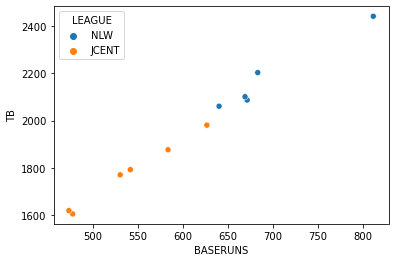

In [206]:
sns.scatterplot(x="BASERUNS", y="TB",
              hue="LEAGUE",
              data=newdf)

#### This seems like a pretty strong linear relationship, but I need to keep in mind that it is a relatively small sample. 

In [208]:
TB_BASERUNS_CORR = np.corrcoef(newdf.TB, newdf.BASERUNS)
TB_BASERUNS_CORR

array([[1.        , 0.99470884],
       [0.99470884, 1.        ]])

#### From this Pearson Coefficient calculation, I might conclude that the Sabermetrics might be useless and Total Bats would be quicker and easier to use as a metric. However, I know better because the Base Runs metric has been used for years in more complex analysis and my sample size is small. 

## Summary

My goal for this project was to scrape web pages for teams in the National League West of Major League Baseball (MLB) in the US and compare it to data scraped for Japan's Central League of the Nippon Professional Baseball Organization (NPB) of Japan. The NPB dates back to 1934 and has fans that rival any American team. It is natural to begin to wonder how the teams stack up against each other. 

I am using a stastic created by David Smyth called Base Runs. It is used widely throughout baseball, although there are a few different formulas. Each team customizes their stats and standards to their own needs. The Base Run calculation uses offensive stastics to determine a number of runs that a team *should* score.

After putting the 2022 data from both leagues into one dataframe, I began my analysis. First, I created a basic bar plot. I could see that the LA Dodgers were clearly outperforming the others in the Base Run category. The others that trailed closest behind were also in the National League West. It seemed that the American teams had higher scores. 

To be sure, I ran the same bar plot but added in a hue that clearly showed which team belonged to which league. Then, I used the grouby function to create side-by-side boxplots that displayed the mean and outliers for each league. This made the difference in Base Run performance even more obvious. To make sure there was a statistically significant difference, I ran a One Way Anova. My Pvalue proved that it was signifiant. I can say for the year 2022, the NL West outperformed Japan's Central League in the Base Run category. 

Interestingly enough, the two teams, LA Dodgers and Yakult Swallows, with the highest Base Run calculation in their respective leagues also finished with the most wins for their league. LA actually had the most wins in the entire MLB. Though, neither team won a championship. Further MLB and NPB analysis would need to be done to see exactly how effective the Base Run calculation is at determining success at the highest level. 

I also wanted to check to see if there was another variable that was closely related to the Base Run column of my data. It turned out that Total Bases and Base Runs were highly correlated and had a strong linear relationship. Because of this, I might be led to believe that calculating the Base Runs is an unnecessary step. Why not just use Total Bases to determine offensive potential? However, I know that my sample size is too small to make such a leap. After all, this calculation has stood the test of time (and fanatic statisticians) for the last 30 years. 